<h1><center> IRIS Classification </center></h1>

## Objectives

__This project is a course project from IBM Data Science. The dataset is copied from that course.__ 

IRIS is a genus of plants in the Iridance family, wth around 300 species. IRIS classification is a project that uses machine learning to predict flowers based on their features. It is a multi-calss classification. The dataset is IRIS dataset. It consists of 3 different types of irises' (Setosa y=0, Versicolour y=1, and Virginica y=2) petal and sepal length, stored in a 150x4 numpy.ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width. An organization of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a>Download Data</a>
        </li>
     </ul>
    <ul>
        <li>
            <a>Data Wrangling</a>
            <ul>
                <li>Deal wiht Missing Data</li>
                <li>Correct Data Format</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a>Data Exploratory</a>
            <ul>
                <li>Describe</li>
                <li>Visualization</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a>Model Development</a>
            <ul>
                <li>Logistic Regression</li>
                <li>SVC</li>
            </ul>
        </li>
    </ul>
</div>

<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 1. Download Data

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
Y = iris.target

## 2. Data Wrangling

In [4]:
df = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df['Target']=Y

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


There are no missing data and all data types are correct.

## 3. Exploratory Data Analysis

Data Exploratory or data analysis is requried to find the features or characteristics of the data. 

In [6]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df['Target'].value_counts()

Target
0    50
1    50
2    50
Name: count, dtype: int64

Text(0, 0.5, 'petal width')

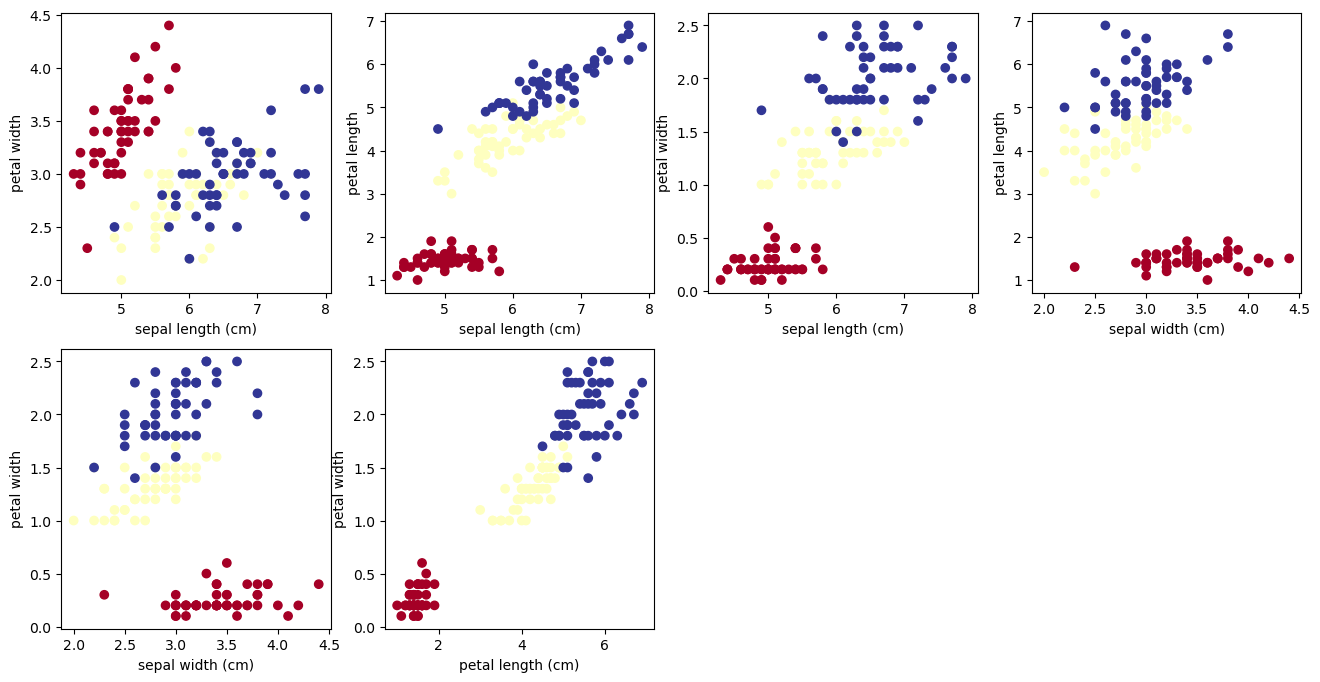

In [8]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal width")

plt.subplot(2,4,2)
plt.scatter(X[:, 0], X[:, 2], c=Y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length")

plt.subplot(2,4,3)
plt.scatter(X[:, 0], X[:, 3], c=Y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal width")

plt.subplot(2,4,4)
plt.scatter(X[:, 1], X[:, 2], c=Y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal length")

plt.subplot(2,4,5)
plt.scatter(X[:, 1], X[:, 3], c=Y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")

plt.subplot(2,4,6)
plt.scatter(X[:, 2], X[:, 3], c=Y, cmap=plt.cm.RdYlBu)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width")


### 4. Model Development

In this section, a Logistic Regression model and a SVC model are developed to classify the target.

#### 4.0 Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=3)

In [10]:
lr = LogisticRegression(random_state=0)

In [11]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [13]:
yhat = lr.predict(x_test)

print('Logistic Regression Accuracy is', round(accuracy_score(y_test,yhat),4))

Logistic Regression Accuracy is 1.0


In [14]:
probability=lr.predict_proba(x_test)

In [15]:
def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

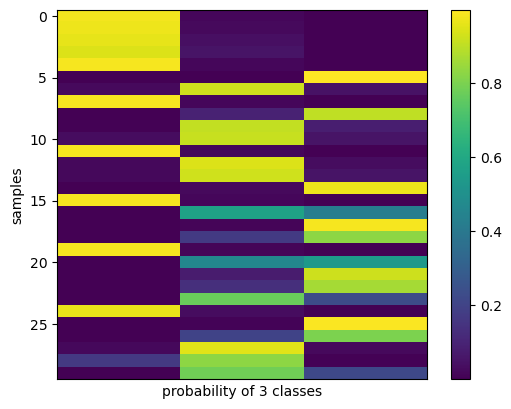

In [16]:
plot_probability_array(x_test,probability)

Here is the output for the first sample:

In [17]:
probability[0,:]

array([9.80515548e-01, 1.94843980e-02, 5.38922872e-08])

In [18]:
probability[0,:].sum()

1.0000000000000002

we can apply the $argmax$ function 

In [19]:
np.argmax(probability[0,:])

0

We can apply the $argmax$ function to each sample

In [20]:
softmax_prediction=np.argmax(probability,axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1], dtype=int64)

In [21]:
yhat =lr.predict(x_test)
print('Softmax Accuracy is', round(accuracy_score(yhat,softmax_prediction),2))

Softmax Accuracy is 1.0


#### 4.1 SVC

In [22]:
from sklearn import svm
clf = svm.SVC(kernel='linear', gamma=.5, probability=True)
clf.fit(x_train,y_train) 

SVC(gamma=0.5, kernel='linear', probability=True)

In [23]:
yhat = clf.predict(x_test)

print('SVM Accuracy is', round(accuracy_score(y_test,yhat),4))

SVM Accuracy is 0.9667


In [24]:
probability=clf.predict_proba(x_test)

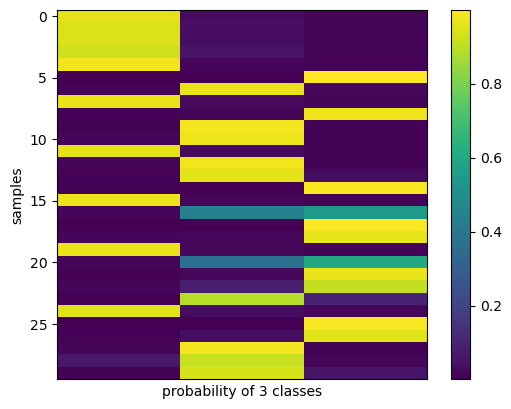

In [25]:
plot_probability_array(x_test,probability)

In [26]:
softmax_prediction=np.argmax(probability,axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1], dtype=int64)

In [27]:
print('Softmax Accuracy is', round(accuracy_score(yhat,softmax_prediction),2))

Softmax Accuracy is 1.0


Both models did a very good job. The accurays are close to 1.0. The softmax accuracys are 1.0